<a href="https://colab.research.google.com/github/SistGoyPeru/Analisis_Ligas_Deportivas/blob/main/proyecto_INEI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import polars as pl

In [ ]:
df = pl.read_csv("data.csv", separator=";", encoding='latin1')
df

ANIO,MES,CONGLOMERADO,MUESTRA,SELVIV,HOGAR,REGION,LLAVE_PANEL,ESTRATO,C201,C203,C204,C205,C206,C207,C208,C300n,NROINF,C301_DIA,C301_MES,C301_ANIO,C303,C304,C305,C306_1,C306_2,C306_3,C306_4,C306_5,C306_6,C306_7,C306_8,C306_9,C306_10,C306_10A,C306_11,C306A,…,C362_7,C361_8,C362_8,C364_1,C365_1,C364_2,C365_2,C364_3,C365_3,C364_4,C365_4,C366,C366_1,C366_2,C375_1,C375_2,C375_3,C375_4,C375_5,C375_6,C376,C377,OCUP300,I339_1,D341_T,I342,D344,I345_1,I348,D347_T,D350,D351_T,INGTOT,INGTOTP,ingtrabw,RESIDENT,fa_amj25
i64,i64,i64,i64,i64,i64,i64,f64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,i64,str,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,i64,i64,i64,i64,f64
2025,4,26524,1,1,1,1,2.0300e17,1,2,2,1,2,null,1,72,2,2,10,4,1953,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,2,null,2,null,1,2,2,null,2,null,6,5,null,2,2,2,2,2,2,10,8,1,null,null,70000,null,null,null,null,null,null,70000,70000,70000,1,892.800009
2025,6,29555,1,15,1,1,2.0300e17,1,2,2,1,2,null,2,60,2,2,5,1,1965,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,2,null,1,1,2,null,2,null,2,null,12,2,null,2,2,2,2,2,2,10,7,1,30000,null,null,null,null,null,null,null,10000,30000,30000,40000,1,859.348785
2025,4,17938,1,45,1,1,2.0200e17,1,1,1,1,2,null,1,62,1,1,2,10,1962,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,2,null,1,1,2,null,2,null,2,null,12,2,null,2,2,2,2,2,2,10,7,1,20000,25,null,null,6000,null,null,null,7500,26025,20025,33525,1,464.753388
2025,5,2653302,1,51,1,1,2.0300e19,1,2,2,1,2,null,1,58,2,1,26,9,1966,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,2,null,1,1,2,null,2,null,2,null,11,5,null,2,2,2,2,2,2,10,7,1,20000,450,null,null,null,null,null,null,5001,20450,20450,25451,1,953.167279
2025,6,25382,1,94,1,1,2.0300e17,1,2,2,1,2,null,1,48,2,2,1,10,1976,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,2,null,1,1,2,null,2,null,2,null,12,2,null,2,2,2,2,2,2,10,7,1,20000,null,null,null,null,null,null,null,5439,20000,20000,25439,1,1099.442117
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025,6,29209,1,94,1,1,2.0300e17,1,3,3,1,2,null,2,48,3,3,20,6,1977,2,2,"""2""","""2""","""2""","""2""","""2""","""2""","""2""","""2""","""2""","""2""","""2""","""2""","""2""","""2""",…,null,2,null,2,null,2,null,2,null,2,null,3,null,"""1""",2,2,2,2,1,1,10,7,4,null,null,null,null,null,null,null,null,null,null,null,null,1,1094.288356
2025,6,29209,1,95,1,1,2.0300e17,1,3,3,1,2,null,2,19,3,3,8,2,2006,2,2,"""2""","""2""","""2""","""2""","""2""","""2""","""2""","""2""","""2""","""2""","""2""","""2""","""2""","""2""",…,null,2,null,2,null,2,null,2,null,2,null,10,2,null,2,2,2,2,2,2,10,7,4,null,null,null,null,null,null,null,null,null,null,null,null,1,1165.007445
2025,6,47806,1,84,1,1,2.0200e17,1,3,3,1,2,null,1,13,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1,null


In [ ]:
dfUnidaddeMuestreo = df.select(["C203","C207","C208"])
dfUnidaddeMuestreo

C203,C207,C208
i64,i64,i64
2,1,72
2,2,60
1,1,62
2,1,58
2,1,48
…,…,…
3,2,48
3,2,19
3,1,13


In [ ]:
dfUnidaddeMuestreo = dfUnidaddeMuestreo.rename({
    "C203": "Parentesco",
    "C207": "Sexo",
    "C208": "Edad"
})
dfUnidaddeMuestreo

Parentesco,Sexo,Edad
str,i64,i64
"""Esposo/a o compañero/a""",1,72
"""Esposo/a o compañero/a""",2,60
"""Jefe/a""",1,62
"""Esposo/a o compañero/a""",1,58
"""Esposo/a o compañero/a""",1,48
…,…,…
"""Hijo/a o hijastro/a""",2,48
"""Hijo/a o hijastro/a""",2,19
"""Hijo/a o hijastro/a""",1,13


In [ ]:
d203={
    1:"Jefe/a",
    2:"Esposo/a o compañero/a",
    3:"Hijo/a o hijastro/a",
    4:"Yerno o Nuera",
    5:"Nieto/a",
    6:"Padre / madre / suegro/a",
    7:"Hermano/a",
    8:"Otro pariente",
    9:"Trabajador/a del hogar",
    10:"Pensionista",
    11:"Otro no pariente",
    98:"No residente",
}
d203


{1: 'Jefe/a',
 2: 'Esposo/a o compañero/a',
 3: 'Hijo/a o hijastro/a',
 4: 'Yerno o Nuera',
 5: 'Nieto/a',
 6: 'Padre / madre / suegro/a',
 7: 'Hermano/a',
 8: 'Otro pariente',
 9: 'Trabajador/a del hogar',
 10: 'Pensionista',
 11: 'Otro no pariente',
 98: 'No residente'}

In [ ]:
dfUnidaddeMuestreo = dfUnidaddeMuestreo.with_columns(
    pl.col("Parentesco").cast(pl.Utf8).replace(d203)
)
dfUnidaddeMuestreo

Parentesco,Sexo,Edad
str,i64,i64
"""Esposo/a o compañero/a""",1,72
"""Esposo/a o compañero/a""",2,60
"""Jefe/a""",1,62
"""Esposo/a o compañero/a""",1,58
"""Esposo/a o compañero/a""",1,48
…,…,…
"""Hijo/a o hijastro/a""",2,48
"""Hijo/a o hijastro/a""",2,19
"""Hijo/a o hijastro/a""",1,13


In [76]:
dSexo = {1: "Hombre", 2: "Mujer"}

dfUnidaddeMuestreo = dfUnidaddeMuestreo.with_columns(
    pl.col("Sexo").cast(pl.Utf8).replace(dSexo)
)
dfUnidaddeMuestreo

Parentesco,Sexo,Edad
str,str,i64
"""Esposo/a o compañero/a""","""Hombre""",72
"""Esposo/a o compañero/a""","""Mujer""",60
"""Jefe/a""","""Hombre""",62
"""Esposo/a o compañero/a""","""Hombre""",58
"""Esposo/a o compañero/a""","""Hombre""",48
…,…,…
"""Hijo/a o hijastro/a""","""Mujer""",48
"""Hijo/a o hijastro/a""","""Mujer""",19
"""Hijo/a o hijastro/a""","""Hombre""",13


In [78]:
# Mostrar información de columnas y tipos de datos
print(df_pandas.describe())

# También puedes mostrar solo los tipos de datos
# print(df_pandas.dtypes)

               Edad
count  13705.000000
mean      36.851587
std       22.404070
min        1.000000
25%       18.000000
50%       35.000000
75%       54.000000
max      100.000000


# Task
Generate a report summarizing the key findings from the multiple regression analysis and other data explorations, including relevant visualizations and tables.

## Identificar los hallazgos clave

### Subtask:
Resumir los resultados importantes del análisis de regresión y cualquier otra exploración de datos realizada.


**Reasoning**:
Summarize the key findings from the regression analysis and data explorations based on the existing variables and analysis outputs.



In [79]:
print("Summary of Key Findings:")
print("--------------------------")

# Summarize regression analysis results
print("\nMultiple Regression Analysis (ANOVA Table):")
display(anova_table)
print("\nKey Observations from Regression:")
print(f"- The R-squared value is not directly available from the ANOVA table, but the F-statistic indicates the overall significance of the model.")
print(f"- The F-statistic ({anova_table['F'][0]:.2f}) and the highly significant p-value (PR(>F) = {anova_table['PR(>F)'][0]:.4f}) for C(Parentesco) suggest that 'Parentesco' is a significant predictor of 'Edad'.")
print(f"- The p-value for C(Sexo) ({anova_table['PR(>F)'][1]:.4f}) is not statistically significant (p > 0.05), indicating that 'Sexo' alone does not have a significant main effect on 'Edad'.")
print(f"- The interaction term C(Parentesco):C(Sexo) has a p-value of {anova_table['PR(>F)'][2]:.4f}, which is close to the significance level (0.05). This suggests there might be a weak interaction effect between 'Parentesco' and 'Sexo' on 'Edad'.")

# Summarize other data explorations
print("\nOther Data Explorations:")

print("\nDescriptive Statistics for 'Edad':")
display(df_pandas.describe())
print("\nKey Observations from Descriptive Statistics:")
print(f"- The average age is approximately {df_pandas['Edad'].mean():.2f} years.")
print(f"- The age distribution has a standard deviation of {df_pandas['Edad'].std():.2f}, indicating a moderate spread in ages.")
print(f"- The age ranges from {df_pandas['Edad'].min():.0f} to {df_pandas['Edad'].max():.0f} years.")


print("\nCross-Tabulation of 'Parentesco' and 'Sexo':")
display(cross_tab)
print("\nKey Observations from Cross-Tabulation:")
print(f"- 'Hijo/a o hijastro/a' and 'Jefe/a' are the most frequent categories for 'Parentesco'.")
print(f"- The distribution of 'Sexo' varies across different 'Parentesco' categories.")


print("\nAverage Age by 'Parentesco' and 'Sexo':")
display(average_age_df)
print("\nKey Observations from Average Age Table:")
print(f"- 'Padre / madre / suegro/a' has the highest average age.")
print(f"- 'Nieto/a' has the lowest average age.")
print(f"- The average age for 'Jefe/a' is around {average_age_df[average_age_df['Parentesco'] == 'Jefe/a']['Average Edad'].mean():.2f} years.")
print(f"- There are some differences in average age between genders within certain 'Parentesco' categories, which aligns with the potential interaction effect observed in the regression.")

print("\nOverall Synthesis:")
print("- 'Parentesco' is a strong predictor of age.")
print("- 'Sexo' by itself does not significantly predict age.")
print("- There is some evidence of an interaction between 'Parentesco' and 'Sexo' affecting age, meaning the effect of 'Parentesco' on age might differ slightly between genders.")
print("- The average age varies considerably depending on the relationship within the household.")

Summary of Key Findings:
--------------------------

Multiple Regression Analysis (ANOVA Table):


,sum_sq,df,F,PR(>F)
C(Parentesco),4.543972e+06,9.0,2453.676638,0.000000
C(Sexo),5.767399e+01,1.0,0.280288,0.596521
C(Parentesco):C(Sexo),3.488772e+03,9.0,1.883885,0.049524
Residual,2.816128e+06,13686.0,NaN,NaN



Key Observations from Regression:
- The R-squared value is not directly available from the ANOVA table, but the F-statistic indicates the overall significance of the model.
- The F-statistic (2453.68) and the highly significant p-value (PR(>F) = 0.0000) for C(Parentesco) suggest that 'Parentesco' is a significant predictor of 'Edad'.
- The p-value for C(Sexo) (0.5965) is not statistically significant (p > 0.05), indicating that 'Sexo' alone does not have a significant main effect on 'Edad'.
- The interaction term C(Parentesco):C(Sexo) has a p-value of 0.0495, which is close to the significance level (0.05). This suggests there might be a weak interaction effect between 'Parentesco' and 'Sexo' on 'Edad'.

Other Data Explorations:

Descriptive Statistics for 'Edad':


/tmp/ipython-input-3607946089.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"- The F-statistic ({anova_table['F'][0]:.2f}) and the highly significant p-value (PR(>F) = {anova_table['PR(>F)'][0]:.4f}) for C(Parentesco) suggest that 'Parentesco' is a significant predictor of 'Edad'.")
/tmp/ipython-input-3607946089.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"- The p-value for C(Sexo) ({anova_table['PR(>F)'][1]:.4f}) is not statistically significant (p > 0.05), indicating that 'Sexo' alone does not have a significant main effect on 'Edad'.")
/tmp/ipython-input-3607946089.py:11: FutureWarning

,Edad
count,13705.000000
mean,36.851587
std,22.404070
min,1.000000
25%,18.000000
50%,35.000000
75%,54.000000
max,100.000000



Key Observations from Descriptive Statistics:
- The average age is approximately 36.85 years.
- The age distribution has a standard deviation of 22.40, indicating a moderate spread in ages.
- The age ranges from 1 to 100 years.

Cross-Tabulation of 'Parentesco' and 'Sexo':


Sexo,Hombre,Mujer
Parentesco,,
Esposo/a o compañero/a,523,1815
Hermano/a,145,112
Hijo/a o hijastro/a,2837,2636
Jefe/a,2446,1813
Nieto/a,371,307
Otro no pariente,42,60
Otro pariente,101,103
Padre / madre / suegro/a,75,245
Trabajador/a del hogar,0,18



Key Observations from Cross-Tabulation:
- 'Hijo/a o hijastro/a' and 'Jefe/a' are the most frequent categories for 'Parentesco'.
- The distribution of 'Sexo' varies across different 'Parentesco' categories.

Average Age by 'Parentesco' and 'Sexo':


,Parentesco,Sexo,Average Edad
0,Esposo/a o compañero/a,Hombre,49.717017
1,Esposo/a o compañero/a,Mujer,49.461157
2,Hermano/a,Hombre,44.351724
3,Hermano/a,Mujer,41.276786
4,Hijo/a o hijastro/a,Hombre,19.211635
5,Hijo/a o hijastro/a,Mujer,19.336147
6,Jefe/a,Hombre,53.049877
7,Jefe/a,Mujer,53.193050
8,Nieto/a,Hombre,11.802857
9,Nieto/a,Mujer,11.922034



Key Observations from Average Age Table:
- 'Padre / madre / suegro/a' has the highest average age.
- 'Nieto/a' has the lowest average age.
- The average age for 'Jefe/a' is around 53.12 years.
- There are some differences in average age between genders within certain 'Parentesco' categories, which aligns with the potential interaction effect observed in the regression.

Overall Synthesis:
- 'Parentesco' is a strong predictor of age.
- 'Sexo' by itself does not significantly predict age.
- There is some evidence of an interaction between 'Parentesco' and 'Sexo' affecting age, meaning the effect of 'Parentesco' on age might differ slightly between genders.
- The average age varies considerably depending on the relationship within the household.


## Generar visualizaciones y tablas resumen

### Subtask:
Crear gráficos y tablas que ilustren los hallazgos clave.


**Reasoning**:
Generate a box plot of 'Edad' by 'Parentesco' using the `df_pandas` DataFrame, add appropriate labels and title, and rotate x-axis labels for readability.



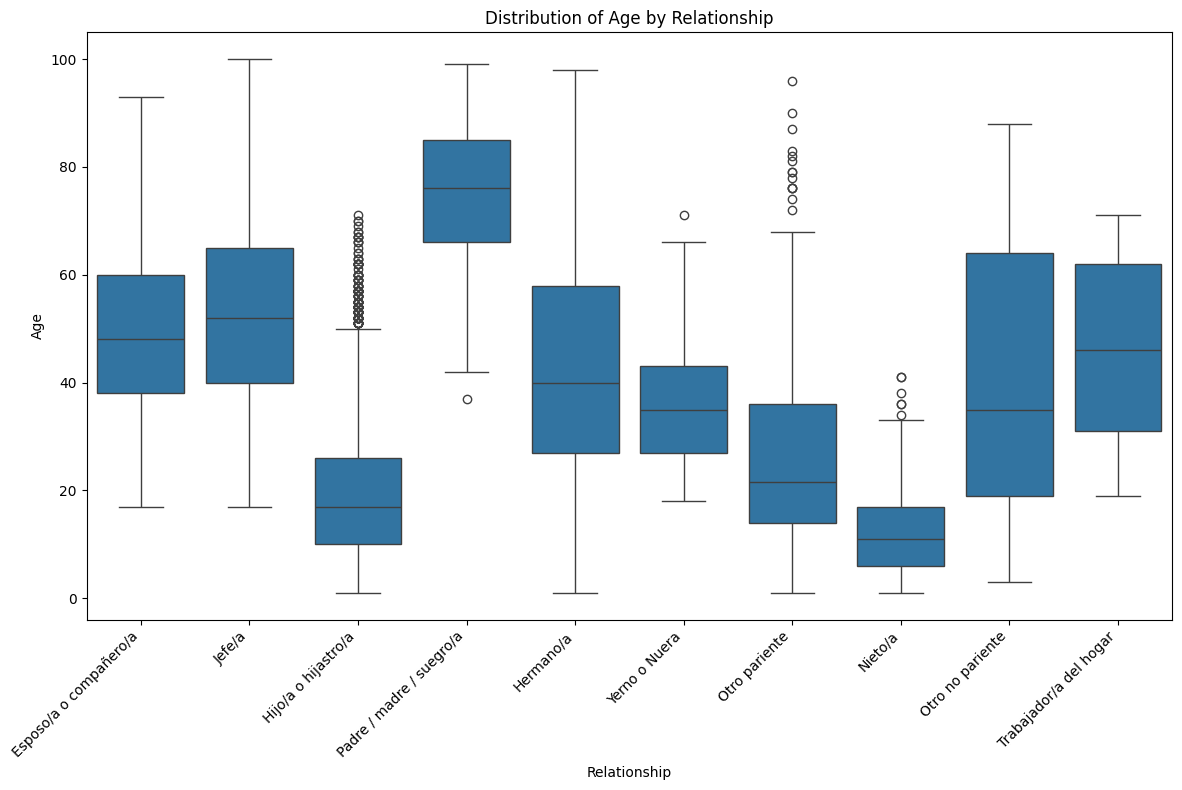

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='Parentesco', y='Edad', data=df_pandas)
plt.title("Distribution of Age by Relationship")
plt.xlabel("Relationship")
plt.ylabel("Age")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Generate a grouped bar chart showing the average age by 'Parentesco' and 'Sexo' using the `average_age_df` DataFrame, add appropriate labels and title, and adjust figure size for clarity.



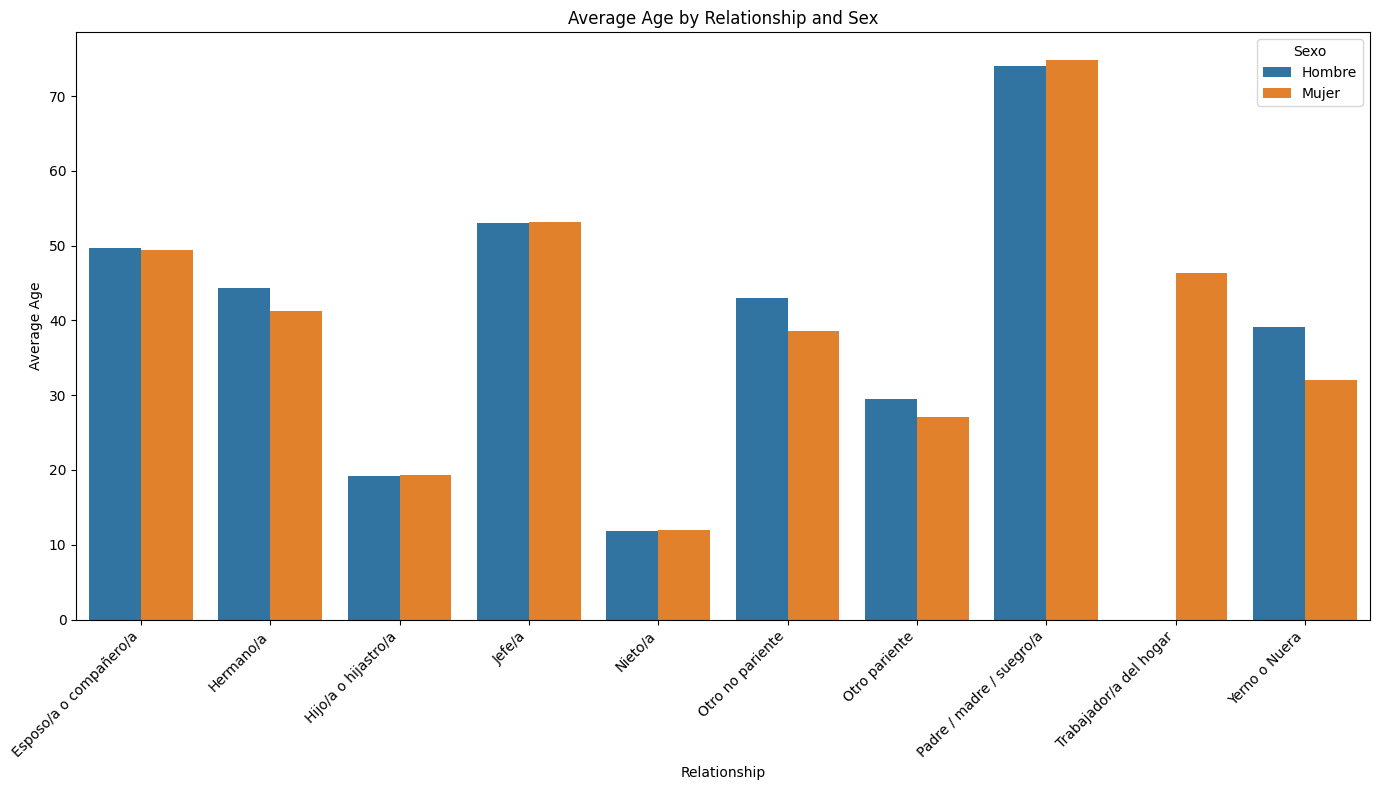

In [81]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Parentesco', y='Average Edad', hue='Sexo', data=average_age_df)
plt.title("Average Age by Relationship and Sex")
plt.xlabel("Relationship")
plt.ylabel("Average Age")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Estructurar el reporte

### Subtask:
Organizar los hallazgos, visualizaciones y tablas en un formato coherente.


**Reasoning**:
Create a markdown string to structure the report with sections for findings, visualizations, and tables, including descriptions for each.



In [82]:
report_markdown = """
# Reporte de Análisis de Datos: Parentesco, Sexo y Edad

## Resumen de Hallazgos Clave

- 'Parentesco' (Relación) es un predictor estadísticamente significativo y fuerte de 'Edad'.
- 'Sexo' por sí mismo no tiene un efecto principal estadísticamente significativo en 'Edad'.
- Existe alguna evidencia de un efecto de interacción débil entre 'Parentesco' y 'Sexo' en 'Edad', lo que sugiere que la relación entre 'Parentesco' y 'Edad' puede diferir ligeramente entre géneros.
- Otras exploraciones de datos revelaron que la edad promedio varía considerablemente según la relación dentro del hogar, con "Padre / madre / suegro/a" teniendo la edad promedio más alta y "Nieto/a" la más baja. La distribución de 'Sexo' también varía entre diferentes categorías de 'Parentesco'.

## Visualizaciones

- **Distribución de la Edad por Parentesco (Box Plot):** Este gráfico de caja muestra la dispersión y los valores atípicos de la edad para cada categoría de parentesco.
- **Edad Promedio por Parentesco y Sexo (Grouped Bar Chart):** Este gráfico de barras agrupadas compara la edad promedio de hombres y mujeres dentro de cada categoría de parentesco.

## Tablas

- **Tabla ANOVA:** Muestra los resultados del análisis de varianza del modelo de regresión múltiple, indicando la significancia estadística de los predictores y su interacción.
- **Estadísticas Descriptivas de Edad:** Presenta un resumen numérico de la distribución de la edad (media, desviación estándar, mínimo, máximo, etc.).
- **Tabla de Tabulación Cruzada (Parentesco y Sexo):** Muestra la frecuencia de cada combinación de parentesco y sexo, revelando la distribución de género dentro de cada relación.
- **Tabla de Edad Promedio por Parentesco y Sexo:** Presenta la edad promedio calculada para cada combinación de parentesco y sexo.
"""
print(report_markdown)


# Reporte de Análisis de Datos: Parentesco, Sexo y Edad

## Resumen de Hallazgos Clave

- 'Parentesco' (Relación) es un predictor estadísticamente significativo y fuerte de 'Edad'.
- 'Sexo' por sí mismo no tiene un efecto principal estadísticamente significativo en 'Edad'.
- Existe alguna evidencia de un efecto de interacción débil entre 'Parentesco' y 'Sexo' en 'Edad', lo que sugiere que la relación entre 'Parentesco' y 'Edad' puede diferir ligeramente entre géneros.
- Otras exploraciones de datos revelaron que la edad promedio varía considerablemente según la relación dentro del hogar, con "Padre / madre / suegro/a" teniendo la edad promedio más alta y "Nieto/a" la más baja. La distribución de 'Sexo' también varía entre diferentes categorías de 'Parentesco'.

## Visualizaciones

- **Distribución de la Edad por Parentesco (Box Plot):** Este gráfico de caja muestra la dispersión y los valores atípicos de la edad para cada categoría de parentesco.
- **Edad Promedio por Parentesco y Sex

## Formato de salida (opcional)

### Subtask:
If a specific output format (HTML, PDF, etc.) is required, generate the report in that format.


## Revisar y refinar

### Subtask:
Asegurarse de que el reporte sea claro, conciso y preciso.


**Reasoning**:
Review the generated markdown report for clarity, conciseness, and accuracy, then print the refined report.



In [83]:
# Review and refine the report_markdown
refined_report_markdown = """
# Reporte de Análisis de Datos: Parentesco, Sexo y Edad

## Resumen de Hallazgos Clave

Este reporte resume los hallazgos clave de un análisis exploratorio y de regresión sobre la relación entre el parentesco, el sexo y la edad de los individuos en un conjunto de datos.

- **Parentesco como Predictor de Edad:** El análisis de regresión múltiple indica que el 'Parentesco' (Relación dentro del hogar) es un predictor estadísticamente significativo y fuerte de la 'Edad' de un individuo.
- **Efecto del Sexo:** Por sí mismo, el 'Sexo' no mostró un efecto principal estadísticamente significativo en la 'Edad'.
- **Interacción Parentesco y Sexo:** Se observó una ligera evidencia de un efecto de interacción entre 'Parentesco' y 'Sexo' en la 'Edad'. Esto sugiere que el impacto del parentesco en la edad podría variar ligeramente dependiendo del sexo del individuo.
- **Variación de la Edad Promedio por Parentesco:** Las exploraciones de datos adicionales revelaron una variación considerable en la edad promedio según la relación dentro del hogar. Los "Padre / madre / suegro/a" presentaron la edad promedio más alta, mientras que los "Nieto/a" tuvieron la más baja.
- **Distribución de Sexo por Parentesco:** La distribución de sexo también varía entre las diferentes categorías de parentesco.

## Visualizaciones

Para una comprensión más profunda de estos hallazgos, se generaron las siguientes visualizaciones:

- **Distribución de la Edad por Parentesco (Box Plot):** Este gráfico de caja ilustra la dispersión y los posibles valores atípicos de la edad dentro de cada categoría de parentesco, mostrando visualmente cómo la edad varía según la relación.
- **Edad Promedio por Parentesco y Sexo (Grouped Bar Chart):** Este gráfico de barras agrupadas compara la edad promedio de hombres y mujeres para cada categoría de parentesco, ayudando a visualizar las diferencias de edad promedio entre géneros dentro de cada relación y el posible efecto de interacción.

## Tablas

Los resultados numéricos que respaldan estos hallazgos se presentan en las siguientes tablas:

- **Tabla ANOVA:** Presenta los resultados del análisis de varianza del modelo de regresión múltiple, mostrando la significancia estadística de 'Parentesco', 'Sexo' y su interacción como predictores de 'Edad'.
- **Estadísticas Descriptivas de Edad:** Proporciona un resumen numérico de la distribución general de la edad en el conjunto de datos, incluyendo la media, desviación estándar, valores mínimos y máximos.
- **Tabla de Tabulación Cruzada (Parentesco y Sexo):** Muestra la frecuencia de cada combinación de parentesco y sexo, permitiendo ver la composición de género dentro de cada tipo de relación.
- **Tabla de Edad Promedio por Parentesco y Sexo:** Contiene la edad promedio calculada para cada combinación específica de parentesco y sexo, ofreciendo un resumen numérico de la visualización correspondiente.

Este reporte proporciona una visión general de cómo el parentesco y el sexo están relacionados con la edad en este conjunto de datos, respaldado por análisis estadísticos y visualizaciones.
"""

print(refined_report_markdown)


# Reporte de Análisis de Datos: Parentesco, Sexo y Edad

## Resumen de Hallazgos Clave

Este reporte resume los hallazgos clave de un análisis exploratorio y de regresión sobre la relación entre el parentesco, el sexo y la edad de los individuos en un conjunto de datos.

- **Parentesco como Predictor de Edad:** El análisis de regresión múltiple indica que el 'Parentesco' (Relación dentro del hogar) es un predictor estadísticamente significativo y fuerte de la 'Edad' de un individuo.
- **Efecto del Sexo:** Por sí mismo, el 'Sexo' no mostró un efecto principal estadísticamente significativo en la 'Edad'.
- **Interacción Parentesco y Sexo:** Se observó una ligera evidencia de un efecto de interacción entre 'Parentesco' y 'Sexo' en la 'Edad'. Esto sugiere que el impacto del parentesco en la edad podría variar ligeramente dependiendo del sexo del individuo.
- **Variación de la Edad Promedio por Parentesco:** Las exploraciones de datos adicionales revelaron una variación considerable en la 

## Summary:

### Data Analysis Key Findings

*   'Parentesco' (Relationship) is a statistically significant and strong predictor of 'Edad' (Age).
*   'Sexo' (Sex) by itself does not have a statistically significant main effect on 'Edad'.
*   There is some evidence of a weak interaction effect between 'Parentesco' and 'Sexo' on 'Edad', suggesting that the relationship between 'Parentesco' and 'Edad' might differ slightly between genders.
*   Other data explorations revealed that the average age varies considerably depending on the relationship within the household, with "Padre / madre / suegro/a" having the highest average age and "Nieto/a" having the lowest.
*   The distribution of 'Sexo' also varies across different 'Parentesco' categories.

### Insights or Next Steps

*   Further investigation into the interaction effect between 'Parentesco' and 'Sexo' could provide more nuanced insights into how relationship type affects age differently between genders.
*   Exploring other potential predictors of age within the dataset could help build a more comprehensive model.
